# Preprocessing dataset

In [113]:
import os
import json
import ast

import pandas as pd
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

---

### Configuration

In [2]:
class cfg:
    data_path_csv = 'data/games.csv'
    data_path_json = 'data/games.json'
    clean_data_path_csv = 'data/clean_games.csv'

In [3]:
df = pd.read_csv(cfg.data_path_csv)

In [4]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [5]:
df.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
79138,2679980,SUIKA DISH,"Nov 17, 2023",0 - 0,0,0,1.99,2,Players drop fruits one by one at any time and...,"['English', 'Simplified Chinese', 'Japanese', ...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://twitter.com/2nekcom,https://twitter.com/2nekcom,NaN,True,False,False,0,NaN,0,0,0,NaN,9,0,NaN,0,0,0,0,2nek,2nek,"Single-player,Steam Achievements,Steam Cloud,S...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
31662,302080,Bus Driver,"Jun 3, 2014",200000 - 500000,8,0,7.99,0,"In Bus Driver , your job is to transport passe...","['English', 'French', 'Italian', 'German', 'Sp...",[],“Bus Driver is one of the most unique games I'...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://busdrivergame.com/,https://busdrivergame.com/support.php,support@busdrivergame.com,True,False,False,61,https://www.metacritic.com/game/pc/bus-driver?...,0,1462,381,NaN,0,1480,NaN,2019,0,97,0,SCS Software,SCS Software,"Single-player,Partial Controller Support,Remot...","Indie,Simulation","Simulation,Automobile Sim,Indie,Driving,Single...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2596,1777210,Can You Escape,"Oct 17, 2021",0 - 20000,0,0,0.99,0,"With elements of automation, puzzling and fun ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@grazebang.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Grazebang,Grazebang,Single-player,"Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
23135,516480,Pinkman,"Jan 16, 2017",20000 - 50000,0,0,0.99,0,"Pinkman is a fast-paced, action platformer abo...",['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,viridinostudios@gmail.com,True,False,False,0,NaN,0,470,12,NaN,23,456,NaN,0,0,0,0,Viridino Studios,Viridino Studios,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie","Casual,Action,Adventure,Indie,Platformer,Great...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
34381,1824990,Marmalade box,"Dec 15, 2021",0 - 20000,0,0,19.99,0,Marmalade box - puzzle game. The object of the...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.kedexa.ru,https://kedexa.ru,admin@kedexa.ru,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Kedexa,Kedexa,Single-player,Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

---

### Fixing data types

In [7]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [8]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df['Release date'] = pd.to_datetime(df['Release date'], format='mixed')
df['Supported languages'] = df['Supported languages'].apply(safe_literal_eval)
df['Full audio languages'] = df['Full audio languages'].apply(safe_literal_eval)
df['Genres'] = df['Genres'].str.split(',')
df['Tags'] = df['Tags'].str.split(',')
df['Estimated owners'] = df['Estimated owners'].apply(lambda x: tuple(map(int, x.split(' - '))))
df = df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Screenshots', 'Movies'])

In [9]:
df.dtypes

AppID                                  int64
Name                                  object
Release date                  datetime64[ns]
Estimated owners                      object
Peak CCU                               int64
Required age                           int64
Price                                float64
DLC count                              int64
About the game                        object
Supported languages                   object
Full audio languages                  object
Reviews                               object
Windows                                 bool
Mac                                     bool
Linux                                   bool
Metacritic score                       int64
Metacritic url                        object
User score                             int64
Positive                               int64
Negative                               int64
Score rank                           float64
Achievements                           int64
Recommenda

### Cleaning the data

Let's look at the missing values in the dataframe.

In [10]:
df.isna().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                         72082
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks   

It seems like metacritic's information and score ranks are almost useless, since they are missing in almost all of the data entries. Hence, we can delete them. However, other missing values are pretty rare, so we shouldn't delete the entire columns.

In [11]:
df[df['Developers'].isna()].sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
74604,2465160,INITIAL D Playtest,2023-06-08,"(0, 0)",0,0,0.0,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
49503,1711670,1428: Shadows over Silesia Beta,2022-02-05,"(0, 0)",0,0,0.0,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
84748,2750840,The Lab and Dungeons Playtest,2023-12-26,"(0, 0)",0,0,0.0,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
60469,1739510,Sinfeld Remastered Playtest,2021-08-30,"(0, 0)",0,0,0.0,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
82168,2696740,Blade Prince Academy Playtest,2023-11-17,"(0, 0)",0,0,0.0,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN


It's easy to see that the games with missing values in columns like `Developers` or `Publishers` are outliers and can be deleted from the dataset.

In [12]:
df = df.drop(columns=['Metacritic score', 'Metacritic url', 'Score rank'])
df = df.drop(df.loc[(df['About the game'].isna()) | (df['Developers'].isna()) | (df['Publishers'].isna()) | (df['Categories'].isna()) | (df['Genres'].isna())].index)
df['Reviews'] = df['Reviews'].fillna('')
df['Notes'] = df['Notes'].fillna('')
df.loc[df['Tags'].isnull(), 'Tags'] = df.loc[df['Tags'].isnull(), 'Tags'].apply(lambda x: [])

In [13]:
df.isna().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Reviews                       0
Windows                       0
Mac                           0
Linux                         0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Notes                         0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

Let's see what games have 0 reviews and 0 playtime.

In [14]:
df[(df['Positive'] + df['Negative'] == 0) & (df['Average playtime forever'] == 0.0)].describe()

,AppID,Release date,Peak CCU,Required age,Price,DLC count,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,1.703000e+04,17030,17030.000000,17030.000000,17030.000000,17030.000000,17030.0,17030.0,17030.0,17030.000000,17030.000000,17030.0,17030.0,17030.0,17030.0
mean,1.994592e+06,2022-07-25 04:56:42.560187648,2.008984,0.177921,5.532585,0.189372,0.0,0.0,0.0,7.770523,10.280505,0.0,0.0,0.0,0.0
min,1.620000e+03,2006-07-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1.716742e+06,2022-01-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,2.096350e+06,2022-11-29 00:00:00,0.000000,0.000000,2.520000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,2.343248e+06,2023-06-10 00:00:00,0.000000,0.000000,6.490000,0.000000,0.0,0.0,0.0,9.000000,0.000000,0.0,0.0,0.0,0.0
max,2.749500e+06,2025-04-14 00:00:00,1895.000000,21.000000,999.980000,101.000000,0.0,0.0,0.0,426.000000,26842.000000,0.0,0.0,0.0,0.0
std,4.708239e+05,NaN,35.344155,1.743370,16.609397,1.770732,0.0,0.0,0.0,17.805955,377.640855,0.0,0.0,0.0,0.0


This means that we can safely delete all games with no user reviews and $0$ played time, since no one has ever played them.

In [15]:
df = df.drop(df.loc[(df['Positive'] + df['Negative'] == 0) & (df['Average playtime forever'] == 0.0)].index)

Let's look at the most expensive games.

In [16]:
df[df['Price'] >= 200]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
26936,1200520,Ascent Free-Roaming VR Experience,2019-12-27,"(0, 20000)",0,0,999.00,0,The Ascent is a Free-Roaming highly immersive ...,[English],[English],,True,False,False,0,6,0,0,0,,0,0,0,0,Fury Games,Fury Games,"Single-player,Multi-player,Co-op,LAN Co-op",[Action],"[Action, VR, Free to Play, Multiplayer, Arena ..."
32110,502570,Houdini Indie,2018-10-10,"(0, 20000)",59,0,269.99,0,As an indie game dev you are faced with the ch...,[English],[],,True,True,False,0,141,7,0,124,,0,0,0,0,SideFX,SideFX,"Partial Controller Support,Steam Cloud","[Animation & Modeling, Design & Illustration, ...","[Animation & Modeling, Game Development, 3D, D..."
57689,253670,Aartform Curvy 3D 3.0,2013-11-12,"(0, 20000)",0,0,299.90,0,Curvy 3D 3.0 is an innovative sculpting progra...,[English],[],,True,False,False,0,32,13,0,0,,150,0,150,0,Aartform,Aartform,Single-player,[Animation & Modeling],[Animation & Modeling]


There are three games with price at least $200, two of which are video editing tools, while the last one is a VR game. By researching the VR game on Steam, it is obvious that the game's price is a scam, since the game itself is poorly designed and developed. Thus, we should delete this game.

In [17]:
df = df.drop(df.loc[df['Price'] >= 990].index)

In [40]:
df['Min owners'] = df['Estimated owners'].apply(lambda x: x[0])
df['Max owners'] = df['Estimated owners'].apply(lambda x: x[1])
df['Mean owners'] = (df['Min owners'] + df['Max owners']) / 2

Now let's save the cleaned version of the dataset.

In [18]:
df.to_csv(cfg.clean_data_path_csv, index=False, na_rep='')

---

# Features' distributions

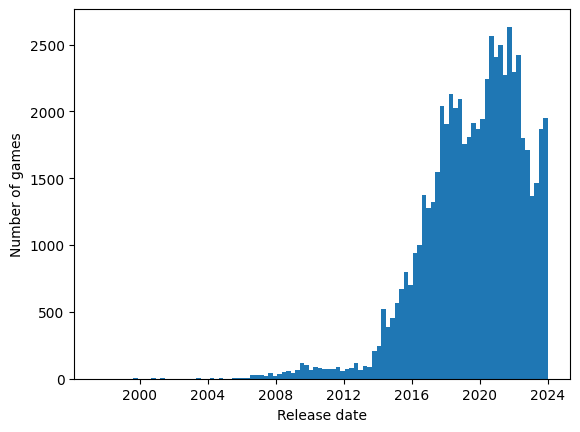

In [120]:
plt.hist(df['Release date'], bins=100)
plt.xlabel('Release date')
plt.ylabel('Number of games')
plt.show()

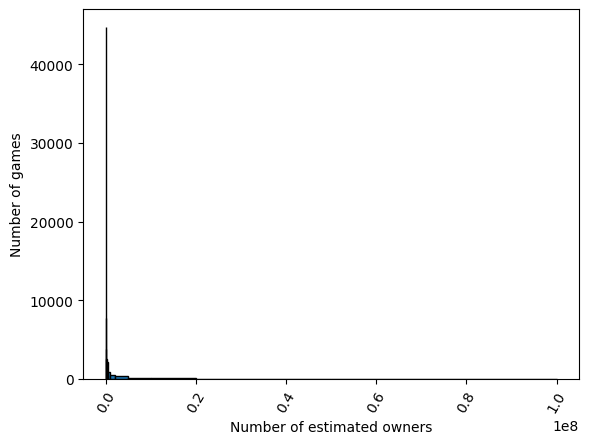

In [121]:
est_own_bins = [x[0] for x in df['Estimated owners'].unique()]

est_own_bins.sort()

plt.hist(df['Mean owners'], bins=est_own_bins, edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Number of estimated owners')
plt.ylabel('Number of games')
plt.show()

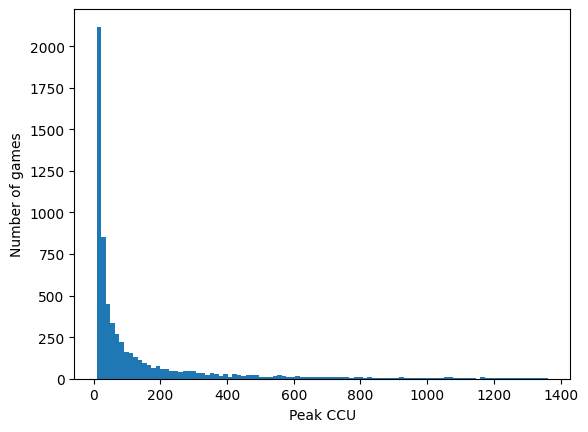

In [122]:
lower_bound = 10
upper_bound = df['Peak CCU'].quantile(0.99)

plt.hist(df[(df['Peak CCU'] >= lower_bound) & (df['Peak CCU'] <= upper_bound)]['Peak CCU'], bins=100)
plt.xlabel('Peak CCU')
plt.ylabel('Number of games')
plt.show()

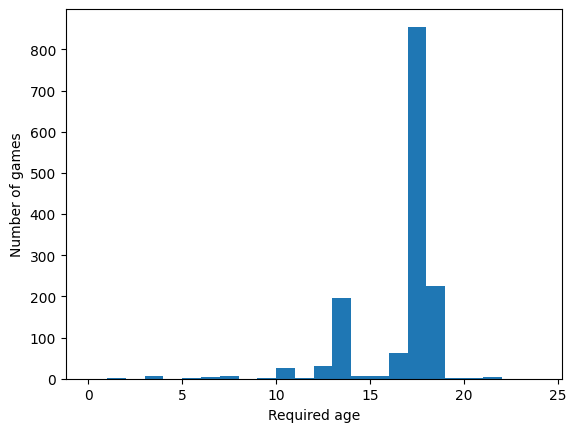

In [123]:
plt.hist(df[df['Required age'] >= 1]['Required age'], bins=list(range(0, 25)))
plt.xlabel('Required age')
plt.ylabel('Number of games')
plt.show()

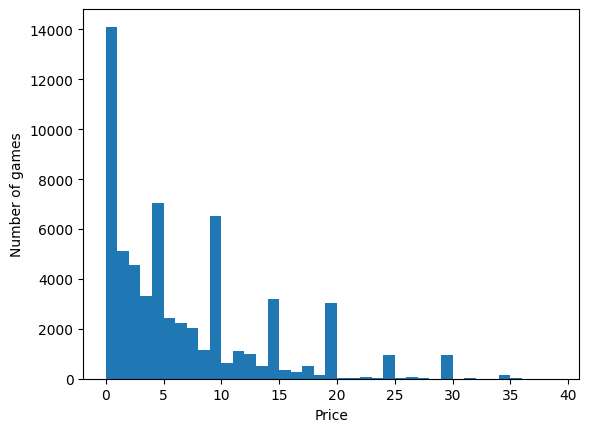

In [129]:
plt.hist(df['Price'], bins=list(range(0, 40)))
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

As we can see, most popular prices are of the form $4.99 or $19.99, because it is a well known marketing trick.

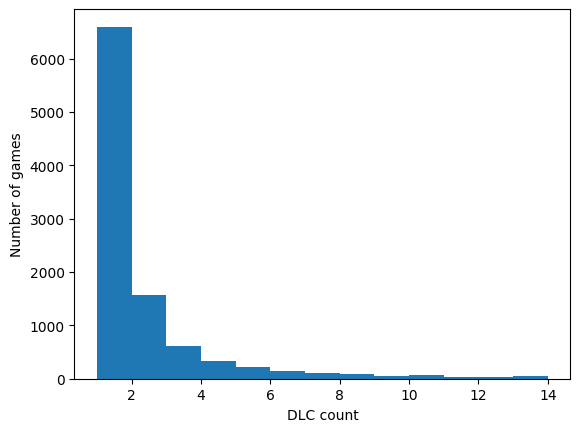

In [130]:
plt.hist(df['DLC count'], bins=range(1, 15))
plt.xlabel('DLC count')
plt.ylabel('Number of games')
plt.show()

In [131]:
df['About the game']

0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
5        Feel tired of auto-fight? Feel tired of boring...
                               ...                        
85077    Ant Farm (formicarium) With A Colony Of Ants. ...
85079    In the once tranquil village of Holyburn, Main...
85083    《Digital Girlfriend》 is a nurturing game of su...
85085    A horror game about a hicker who found himself...
85094    Tower Defense: Cats are towers, ghosts are ene...
Name: About the game, Length: 62827, dtype: object

Let's look at the most supported languages.

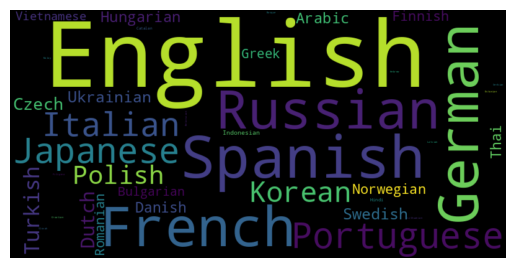

In [26]:
all_languages = [lang for sublist in df['Supported languages'] for lang in sublist]

all_languages = [x.split(' - ')[0] for x in all_languages]

all_languages = [x for x in all_languages if x.isalpha()]

word_counts = {}
for word in all_languages:
    word_counts[word] = word_counts.get(word, 0) + 1

wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

# Hypothesis

1. There exists a relationship between the supported platforms and the average playtime of games.
2. Games with a lower price tend to have higher average playtime and peak concurrent users (CCU).
3. Games released more recently have higher median playtime in the last two weeks compared to older games.
4. Games with lower prices relative to their genre average receive more positive user reviews.
5. Games that support more languages have a higher number of estimated owners.

---

## Supported platforms and average playtime

I hypothesize that wider ranges of supported platforms lead to greater average playtimes, since such games reach broader audience. To verify this hypothesis we will calculate different statistics grouped by available supported platforms.

In [41]:
df.groupby(['Windows', 'Mac', 'Linux'])[['Mean owners', 'Peak CCU', 'Positive', 'Negative', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks']].mean()

Mean owners    Peak CCU     Positive    Negative  \
Windows Mac   Linux                                                       
False   False True    22500.000000    0.000000    41.000000   23.000000   
        True  False   26250.000000    0.125000    56.750000   41.625000   
              True    75000.000000    2.000000   104.000000   20.000000   
True    False False   88166.493059  161.790970   893.037839  188.929742   
              True   110120.104439   58.602089   972.090339  120.259530   
        True  False  122187.595712  136.754364  1331.876417  178.061409   
              True   267182.128240  366.444748  3825.535334  426.187449   

                     Average playtime forever  Average playtime two weeks  \
Windows Mac   Linux                                                         
False   False True                   0.000000                    0.000000   
        True  False                 10.000000                    0.000000   
              True                 341.000000                    0.000000   
True    False False                110.532387                   14.146277   
              True                 120.972846                    8.265274   
        True  False                186.597550                   12.692649   
              True                 219.704502                   16.884720   

                     Median playtime forever  Median playtime two weeks  
Windows Mac   Linux                                                      
False   False True                  0.000000                   0.000000  
        True  False                10.000000                   0.000000  
              True                341.000000                   0.000000  
True    False False                95.491529                  15.436895  
              True                131.095561                   7.662663  
        True  False               168.841041                  14.470138  
              True                169.806685                  16.228513

As we can see, the hypothesis turns out to be true with one exception: when (Windows, Mac, Linux) is (False, True, True). Let's take a look at what games fall into this category.

In [42]:
df[(df['Windows'] == False) & (df['Mac'] == True) & (df['Linux'] == True)]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Min owners,Max owners,Mean owners
6830,594550,Arma: Cold War Assault Mac/Linux,2017-03-14,"(50000, 100000)",2,17,4.99,0,Bohemia Interactive's debut game published by ...,"[English, French, Italian, German, Spanish - S...","[English, Spanish - Spain]",,False,True,True,0,104,20,0,0,,341,0,341,0,Bohemia Interactive,Bohemia Interactive,Single-player,"[Action, Simulation, Strategy]","[Action, Simulation, Strategy, Cold War, FPS]",50000,100000,75000.0


It appears that there is exactly one such game in the cleaned dataset. By searching on Steam, I've found that this game has two versions: one for Windows and another one for Mac/Linux.

In [47]:
df[df['Name'] == 'ARMA: Cold War Assault']

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Min owners,Max owners,Mean owners
32492,65790,ARMA: Cold War Assault,2011-08-08,"(1000000, 2000000)",30,17,4.99,0,Bohemia Interactive's debut game published by ...,"[English, French, Italian, German, Spanish - S...","[English, Spanish - Spain]",,True,False,False,0,4356,1199,0,1789,,39,0,11,0,Bohemia Interactive,Bohemia Interactive,Single-player,"[Action, Simulation, Strategy]","[Simulation, Action, Military, Strategy, Cold ...",1000000,2000000,1500000.0


Since the game itself is pretty popular across all platforms, the statistics of this game for Mac/Linux version shown above make sense, thus, our hypothesis is still true.

---

## Game's price and user engagement

I hypothesize that games with a lower price tend to have higher average playtime and peak concurrent users (CCU). To verify this, let's plot the relationship between the aforementioned statistics.

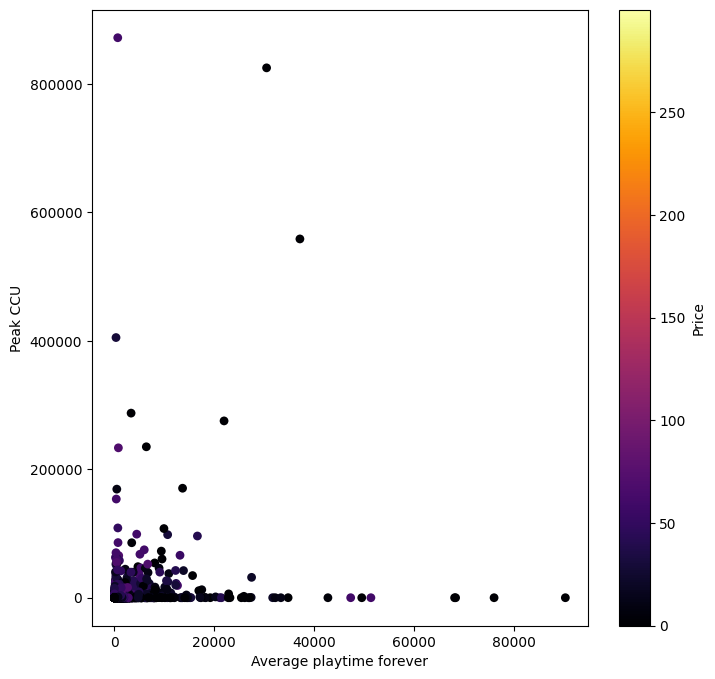

In [63]:
plt.figure(figsize=(8, 8))

plt.scatter(df['Average playtime forever'], df['Peak CCU'], c=df['Price'], cmap='inferno', s=40, edgecolors='none')
plt.colorbar(label='Price')
plt.xlabel('Average playtime forever')
plt.ylabel('Peak CCU')
plt.show()

The plot above is not so representative, so let's temporarily get rid of outliers.

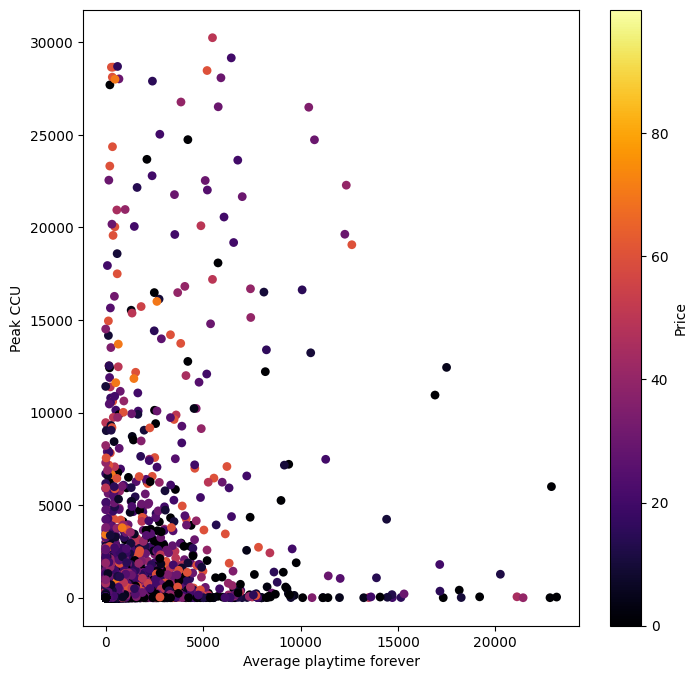

In [67]:
plt.figure(figsize=(8, 8))

cf = df[(df['Average playtime forever'] < 25000) & (df['Price'] < 100) & (df['Peak CCU'] < 32000)]

plt.scatter(cf['Average playtime forever'], cf['Peak CCU'], c=cf['Price'], cmap='inferno', s=40, edgecolors='none')
plt.colorbar(label='Price')
plt.xlabel('Average playtime forever')
plt.ylabel('Peak CCU')
plt.show()

As we can see, expensive games tend to have less playtime. Although, quite a large part of the games with high `Peak CCU` are the expensive ones.

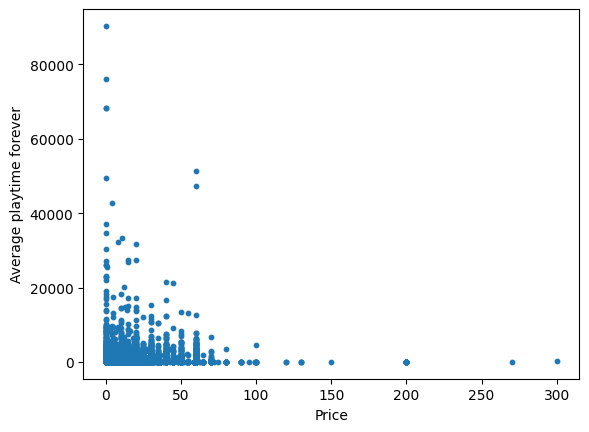

In [60]:
plt.scatter(df['Price'], df['Average playtime forever'], s=10.)

plt.xlabel('Price')
plt.ylabel('Average playtime forever')
plt.show()

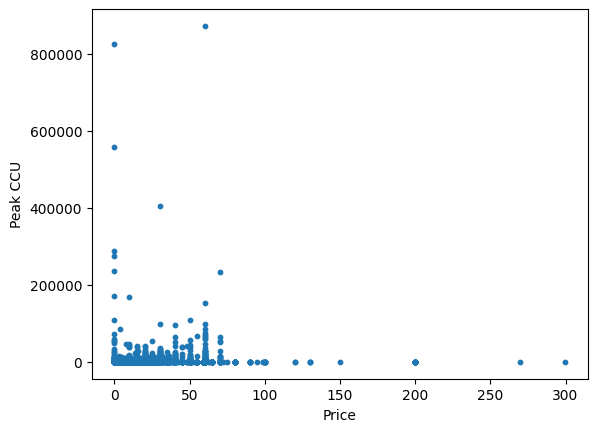

In [61]:
plt.scatter(df['Price'], df['Peak CCU'], s=10.)

plt.xlabel('Price')
plt.ylabel('Peak CCU')
plt.show()

Based on the plots above, it's definite that the hypothesis is true, which means that games with a lower price tend to have higher average playtime and peak concurrent users (CCU)

---

## Recent games have higher playtime in the last two weeks

I hypothesize that games released more recently have higher median playtime in the last two weeks compared to older games.

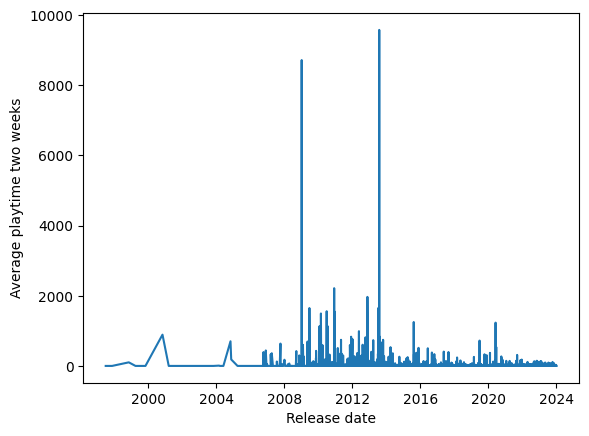

In [107]:
plt.plot(df.groupby('Release date')['Average playtime two weeks'].mean())

plt.xlabel('Release date')
plt.ylabel('Average playtime two weeks')
plt.show()

The scale of the plot above is broken by a couple of very popular games, such as `Dota 2` and `America's Army`. Let's only consider the games that were released from 2021 till now.

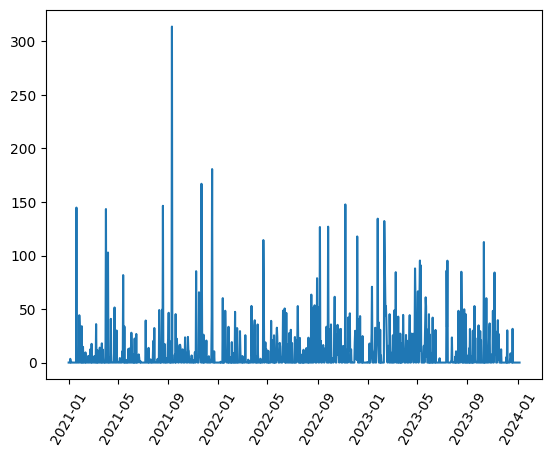

In [109]:
plt.plot(df[df['Release date'].dt.year >= 2021].groupby('Release date')['Average playtime two weeks'].mean())

plt.xticks(rotation=60)
plt.show()

Based on the plots above, it appears that my hypothesis is not true. While it's commonly assumed that newer games would have higher engagement due to freshness and novelty, this might not always hold true. Older games may have established dedicated fan bases or undergone significant updates and improvements over time, leading to sustained or even increased engagement.

---